# Decision Trees

One of the most loved algorithms (when combined with a few other techniques), this one method is often a one-fits-all solution. It's a supervised algorithm, can be used for both classification and regression, can handle both categorical and numerical data (more on that in a bit), and is very easy to interpret.  
Note that, as the name implies, this method uses tree-like structures. You should know about trees in Computer Science. We often work with binary trees (each node has at most two children), though it depends on the problem. 

#### Small recap about trees:  

<img src="https://www.geeksforgeeks.org/wp-content/uploads/binary-tree-to-DLL.png"/>   </br>
Credits: GeeksforGeeks

A tree is a data structure that consists of nodes. Each node has a value and a list of children. The root node is the topmost node, and the leaf nodes are the nodes that have no children.  

In the case of decision trees, each node represents conditions applied to features. When our condition is a boolean (YES/NO values), we imply that the left child is the "yes" branch, and the right child is the "no" branch. Generally, what happens is that a different branch is created for each possible outcome of that condition. We build branches like this until we can no longer split the data and we come to a conclusion (the classification / regression result).  

#### Let's see an example.  

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/Decision_Tree-2.png"/>  </br>
Credits: GeeksforGeeks

Here we see 3 branches created for the feature 'Outlook'. Each of those branches can have their own branches, and so on. In the end, we arrive at a binary classification conclusion (True/False). Other problems might have more than 2 final classes, meaning we have a multi-class classification problem. Other problems would require a regression result, which is a continuous value.  
Let's see a regression tree example:  

<img src="https://miro.medium.com/max/1362/1*lP8cFrVYC6u_9RDtu7DScQ.png"/>  </br>
Credits: Medium

Here we see that condition applied to numerical features have to do with the value. If it's within a certain range, we go left, if it's outside that range, we go right. In the end, the conclusion is a continuous value.



Now that we have the basics down, let's explore the decision tree method.  

First thing we should ask ourselves: "What kind of data do I need?". Decision trees can handle both categorical and numerical data. We can one-hot encode categorical data (turn the various labels into columns with 0s and 1s), and we can use numerical data as-is. What matters overall is that decision Trees use tabular data. Think of Excel spreadsheets, or CSV files. If you can write your data in a table, you can use decision trees.

During this notebook, we will be using the famous Iris dataset. Let's load it and take a look at it.

In [85]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [86]:
# Import Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
X = iris.data[:, 2:] # petal length and width
y = iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


We see that we have 4 features to work with, and 3 classes to predict. Remember that 2D visualization can take at most 2 features, so for now we loaded the petal features into the variable $X$ and the class labels into the variable $y$.  
In a real case, if you could only choose some of the features, you would have to choose the ones that are most relevant to the problem. This could mean that you would choose features that best separate classes, or that have the most variance (see [bias&variance](../otherConcepts/bias&variance.ipynb)).  
Of course, in order to decide you would have to explore your data accordingly (testing multiple combinations, visualizing, thinking about the problem itself and what kind of data may appear etc.).

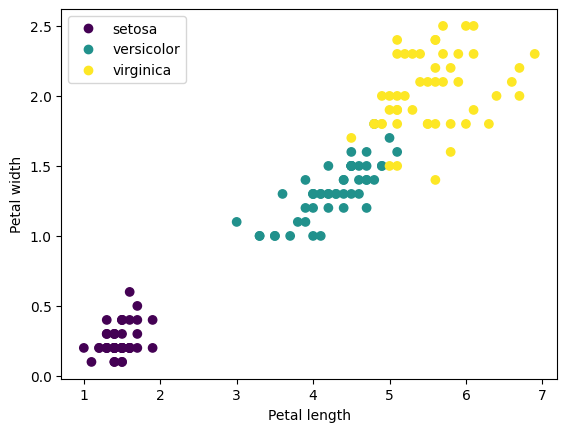

In [87]:
# Plot the iris dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
# Legend
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(y.min(), y.max())
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label = label)
           for i, label in enumerate(iris.target_names)]
plt.legend(handles = handles, loc='upper left')
plt.show()

These are just 2 of the 4 features that are used: *sepal length and width, petal length and width*. Based on these, we have 3 classes: *Iris Setosa, Iris Versicolour, Iris Virginica*.  

We will be using the DecisionTreeClassifier to classify the data, then we'll look at a way to create our own decision tree.

In [88]:
# DecisionTreeClassifier for iris dataset
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2)

In [103]:
# Show decision boundaries
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, indexRange=[2,3], axes=[2,6,2,6, 0, 7.5, 0, 3], iris=True, legend=False, plot_training=True, labelX='Petal length', labelY='Petal width'):
    xNs = [np.linspace(axes[2*i], axes[2*i+1], 100) for i in range(indexRange[0], indexRange[1]+1)]
    xs = [np.meshgrid(xNs[i]) for i in range(len(xNs))]
    x1s = xs[0]
    x2s = xs[1]
    print(len(xs))
    X_new = np.c_[np.ravel(x1s), np.ravel(x2s)]
    y_pred = clf.predict(X_new).reshape(x1s.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1s, x2s, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1s, x2s, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, indexRange[0]][y==0], X[:, indexRange[1]][y==0], 'yo', label='Iris-Setosa')
        plt.plot(X[:, indexRange[0]][y==1], X[:, indexRange[1]][y==1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:, indexRange[0]][y==2], X[:, indexRange[1]][y==2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel(labelX, fontsize=14)
        plt.ylabel(labelY, fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)

In [104]:
X = iris.data[:, :] # petal length and width
plot_decision_boundary(tree_clf, X, y)

2


AttributeError: 'list' object has no attribute 'shape'

We can only use 2 features at a time (because we're working with 2D plots), so we used the *petal length and width* features.    
We can of course use all 4 features, but the visualization part would work different (maybe different library, maybe multiple plots etc.). The plot function used above is just something to help us see the data and the decision boundaries. We can see that the DT tried to classify the overlapping region to its best ability, but in the end some instances are misclassified. Increasing complexity (bigger depth) could help, so let's check that out quickly.

In [ ]:
# Tree with bigger depth
tree_clf2 = DecisionTreeClassifier(max_depth=25)
tree_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=25)

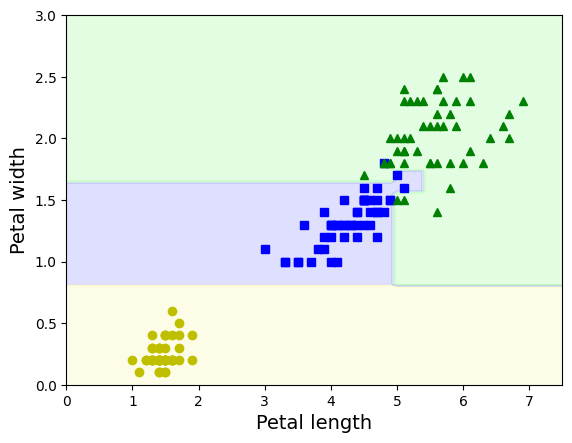

In [ ]:
# Plot decision boundaries
plot_decision_boundary(tree_clf2, X, y)

As we can see, this would definitely be considered overfitting. You could always play around with the depth and see what happens. Note how even a shallow tree (depth=2) can already classify the data quite well. In comparison, the deeper tree (depth=25) is not providing much more value.  

(A little side note, for future reference: Decision Trees are commonly used, but not by themselves; we often combine ideas together to get better results. Some keywords - we will explore at a later date - are: *Random Forests, Gradient Boosting, XGBoost, AdaBoost, Bagging*, etc.; these are all variations of the DT technique)

### Our own

Now we should try to create our own Decision Tree Classifier algorithm. We will be using the same dataset, but we will be using the *sepal length and width* features.  
First step: identifying data. We have numerical data (2 features). We have a classification problem (3 classes). We have tabular data (most types of numerical/categorical data sets can be considered tabular if organized properly).

We now have to discuss the details behind the algorithm.  

#### The algorithm

The DT algorithm works by splitting the data into smaller and smaller subsets, until we either reach our maximum depth (a hyper-parameter), or we can no longer split the data (meaning either all / a majority - % which we set - of the points on that branch belong to the same class).  

This constant splitting of the data leads to recursion. We __do__ use recursion to ease our work. So these are the steps we need to take:  

1. Decide hyper-parameters (stopping conditions mostly) - this is a pre-algorithm step
2. A node on the tree (the root is the first node) represents a condition which we use to split our data (each node has some subset of our data associated with it); most often, this splitting process leads to 2 sub-branches (left and right); in the case of categorical conditions (lets say we have a "*Weather*" feature with 3 categories: Sunny, Cloudy, Rainy), we would have 3 sub-branches (one for each category)
- We have to choose the feature and the condition; to achieve this, we have to quantify the *usefulness* of each feature; we use metrics to do this (mathematical methods are the best, since they are objective and can be used in any situation); here are some of the popular ones:
    - Information Gain
    - Gini Index (this is what we will use here)
    - Chi-Square
    - Entropy
- This *usefulness* of a feature is calculated by comparing the data before and after the split; in an ideal world, this split would completely separate the data into its classes; so the highest score in that regard is the one we choose; the *usefulness* of a feature is its ability to best separate the data so that a vast majority (if not all) of the points belong to the same class after the split; because we measure how mixed datapoints are after a split, we call this **impurity**; so our scores are called *impurity measurements*.
- In order to assess the score, we need to decide the conditions for the split; in the case of categorical data, we could simply create a branch for each outcome; we could also see situations in which we want to have binary decision trees, so rather than having multiple branches (for categorical data), we test each possible combination of those categories ($\sum_{k=1}^{n-1}C^k_n$ tries - splitting based on all categories is useless, since that includes all the data); in the case of numerical data, there are various ways to do it; most commonly, we split into 2 branches, based on a certain value (this could be the mean, the median, the mode, etc.); we could also generate multiple splits, and pick the one that gives us the best score (for example sorting, picking the mean of every 2 consecutive values & assessing the score for each of these means); this is called "*binning*" (assigning multiple values to a single category/value, like assigning people an age category to people); we'll use the mean.

- After picking the way we judge data (the condition) and the way we measure our features (the impurity measurement), we can now calculate the score for each feature; we pick the feature with the highest/lowest score (depending on our measurement method), and we use it to split our data;  
    - Considering our numerical data, we will have a 2-way split, based on the value of the feature. Let's consider on example:
    $$
    \begin{align}
    \text{If } sepalLength \leq 5 \text{, then go left} \\
    \text{Else } (\text{if } sepalLength > 5) \text{, then go right}
    \end{align}
    $$
3. We now have new nodes, each with their respective subsets of data associated; repeat the process for each node (each node is a new tree, with its own root, branches, etc.); we do this until we reach our stopping conditions (maximum depth, perfect split, etc.)
4. The leaf node decides the class of the data; this is done by majority vote (most common class in the subset of data associated with that node); if there is a tie, we could pick the first class, choose randomly, or think about retraining with different hyper-parameters (most notably, the *max-depth* parameter); a tie could also be observed through biased decision boundaries (use visualization to your advantage).


The algorithm benefits from recursivity, since we can easily repeat the process for each node.  This means that we only need to worry about the splitting process, and not about the tree structure itself.  

When a new datapoint needs to be classified, we simply follow the tree, until we reach a leaf (a node with no children); the class of that leaf is the class of the datapoint.

#### A summary:  

In a decision tree, each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The decisions made at each node are based on the attribute with the most predictive power at that point in the tree.

To build a decision tree, the algorithm first identifies the best attribute to split the data on at the root node. It then splits the data into subsets based on the values of that attribute, and repeats the process for each subset at the child nodes. This continues until the algorithm reaches a stopping point, such as when all the data belongs to the same class or when no more attributes are available to split on.

Decision trees are a popular and effective method for classification and regression tasks in machine learning. They are easy to interpret and understand, and can handle both numerical and categorical data. Additionally, they are robust to noise and missing data, and can handle multi-output problems.

### Gini index

The Gini index is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. It means an attribute with lower Gini index should be preferred.  
We would use the following formula:

$$
\begin{align}
Gini = 1 - \sum_{i=1}^{n} p_i^2
\end{align}
$$

Where $p_i$ is the probability of an element belonging to class $i$.  

With our numerical data, we would have 2 classes ($\le,\gt$), so we would have 2 probabilities ($p_1, p_2$).  
The way we calculate probabilities is by counting the number of elements in each class, and dividing by the total number of elements. For example:  
- if we had 5 datapoints with sepal length <=5, and 10 datapoints with sepal length >5, we would have $p_1 = \frac{5}{15}$ and $p_2 = \frac{10}{15}$;
- the Gini index would be $1 - (p_1^2 + p_2^2) = 1 - (\frac{5}{15}^2 + \frac{10}{15}^2) = 0.48$.
- compare this to a perfect split, were we had 15 datapoints with sepal length <=5, and 0 datapoints with sepal length >5; in this case, we would have $p_1 = \frac{15}{15}$ and $p_2 = \frac{0}{15}$;
- the Gini index would be $1 - (p_1^2 + p_2^2) = 1 - (\frac{15}{15}^2 + \frac{0}{15}^2) = 0$.  

So we always prefer the lower Gini index.  

Knowing how we calculate the Gini index, we can now calculate it for each branch, then do a weighted average for each feature. With that as the final scure, we pick the best feature and continue our splitting. We stop when we get a perfect split (or a majority of the data belongs to the same class, or we reach our maximum depth, etc.).

In [ ]:

# Gini impurity - it doesn't have to be complex because we only have 2 features; we really need to calculate only 1 probability, since the other one is 1 - p
def gini(p):
    #return 1 - p**2 - (1 - p)**2 
    # do the math and the equation is equal to 2 * p * (1 - p)
    return 2 * p * (1 - p)

def gini_impurity(y):
    p = np.sum(y == 0) / len(y)
    return gini(p)

# Recursive binary splitting
def split(X, y, d, value):
    # Split the data on feature 'd' at 'value'
    left_indices = (X[:, d] <= value)
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[~left_indices], y[~left_indices]
    return X_left, X_right, y_left, y_right

# Find the best split based on the mean value of each feature
def find_best_split(X, y):
    best_gini = 1.0
    best_d, best_value = None, None
    for d in range(X.shape[1]): # for each feature
        value = np.mean(X[:, d]) # find the mean value
        X_left, X_right, y_left, y_right = split(X, y, d, value) # split the data based on the mean of that feature
        gini_left, gini_right = gini_impurity(y_left), gini_impurity(y_right) # calculate the gini impurity of the left and right splits
        gini = (len(y_left) / len(y)) * gini_left + (len(y_right) / len(y)) * gini_right # calculate the weighted gini impurity
        if gini < best_gini: # if the weighted gini impurity is less than the best gini impurity, update the best gini impurity (we have only 2 features, we could've calculated them directly but this is more general)
            best_gini = gini
            best_d = d # best feature index
            best_value = value # best value for that feature (the mean in our case)
    return best_d, best_value


The functions above are used to recursively go through the tree, build it, and classify new data.  What is missing now is the DecisionTree itself; in order to scale better, we opt for a class-based approach, where we have a DecisionTree class, which has a fit method and a predict method.

In [ ]:
# Decision tree class
class DecisionTree:
    def __init__(self, max_depth=2, majThreshold = 0.8):
        self.max_depth = max_depth
        self.root = None
        self.majThreshold = majThreshold
    def fit(self, X, y):
        self.root = self._grow_tree(X, y)
    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(y.max() + 1)]
        most_samples_per_class = np.max(num_samples_per_class)
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth and most_samples_per_class / np.sum(num_samples_per_class) < self.majThreshold:
            d, value = find_best_split(X, y)
            if d is not None:
                X_left, X_right, y_left, y_right = split(X, y, d, value)
                node.d = d
                node.value = value
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    def _traverse_tree(self, x, node):
        if node.left is None and node.right is None:
            return node.predicted_class
        if x[node.d] <= node.value:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

# Node class
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.d = None
        self.value = None
        self.left = None
        self.right = None

In [ ]:
X = iris.data[:, :2] # sepal length and width
# Hyper-parameters
maxDepth = 2 # picking depth = 2 because we have 2 features; repeating the process for a feature we've already split on is often redundant OR it can lead to overfitting
# Train the model
tree = DecisionTree(max_depth=maxDepth, majThreshold=0.9)
tree.fit(X, y)

# Plot decision boundaries
plot_decision_boundary(tree, X, y, indexRange=[0,1],axes=[X[:,0].min() * 0.95, X[:, 0].max() * 1.1, X[:,1].min() * 0.95, X[:, 1].max() * 1.1], labelX='Sepal length', labelY='Sepal width')

IndexError: list index out of range

Now that we visualize the data, we see that it is really hard to separate datapoints between classes. We want to improve this result. But first, let's go through the code.  

The *_grow_tree* function is meant to be used recursively to build the tree. It takes data associated with its current node, and the current depth. It then calculates the Gini index for each feature, and picks the best one. It then splits the data based on the best feature, and creates new nodes for each branch. It then calls itself for each new node, until it reaches the maximum depth, or until it gets a good enough split (the *majority Threshold* parameter).  

When it comes to the prediction, we have a utility *_traverse_tree* function, which simply goes through the associated tree nodes, until it reaches a leaf (meaning it has no children). It then returns the class of that leaf. This leads us to the other class, the Node class. This one is a simple representation of nodes in the tree. The attributes it holds help us keep track of required information, namely the predicted class within that node, the feature we use to split the data, the value of that feature, and the children nodes.  

Using all of these tools, we can let the tree do its thing and predict the classes of our test data.  

But these 2 features are not enough to separate the classes. We need to add more features. Luckily, since this is our own implementation, we can always modify it to allow for more features. Our goal would be to use the remaining 2 featuers (petal length and petal width) to separate the classes. Of course, the visualization would still be in 2D, but during the training we would use all 4 features.

In [ ]:
X = iris.data # all features
y = iris.target

# Hyper-parameters
maxDepth = 4
# Train the model
tree = DecisionTree(max_depth=maxDepth, majThreshold=0.9)
tree.fit(X, y)


# Plot decision boundaries
plot_decision_boundary(tree, X, y, indexRange=[0,1], axes=[X[:,0].min() * 0.95, X[:, 0].max() * 1.1, X[:,1].min() * 0.95, X[:, 1].max() * 1.1], labelX='Sepal length', labelY='Sepal width')

IndexError: index 2 is out of bounds for axis 0 with size 2